### Student Information
Name:
鍾明遠

Student ID:
108011557

GitHub ID:
mchung0417

Kaggle name:
mchung0417

Kaggle private scoreboard snapshot:

[Snapshot](pic0.png)

<td><img src="pic0.png" style="width: 900px;"/> </td>

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

---
### First-take home excercise

---
### ** >Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [2]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


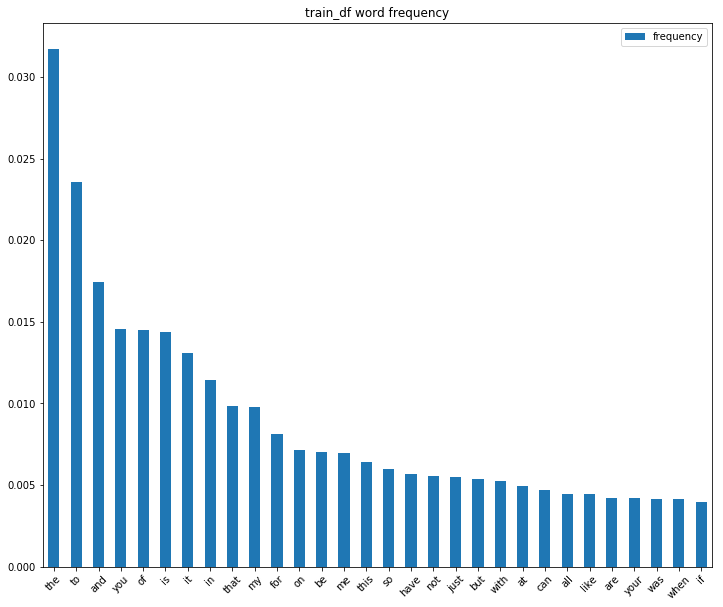

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(train_df.text)
train_word = vectorizer.get_feature_names()

words = {}
for i in range(len(train_word)):
    words[i]=train_word[i]
tf = pd.DataFrame(train_vec.toarray())
tf = tf.rename(words,axis = 1)
tf.loc['frequency']=tf.sum(axis = 0)

tf_= pd.DataFrame(tf.loc['frequency'])
tf_.sort_values(by = 'frequency',ascending=False,inplace = True)
tf_ = tf_.apply(lambda x :x/tf_['frequency'].sum())

tf_[0:30].plot.bar(figsize = (12,10))
plt.xticks(rotation=45)
plt.title('train_df word frequency')
plt.show()

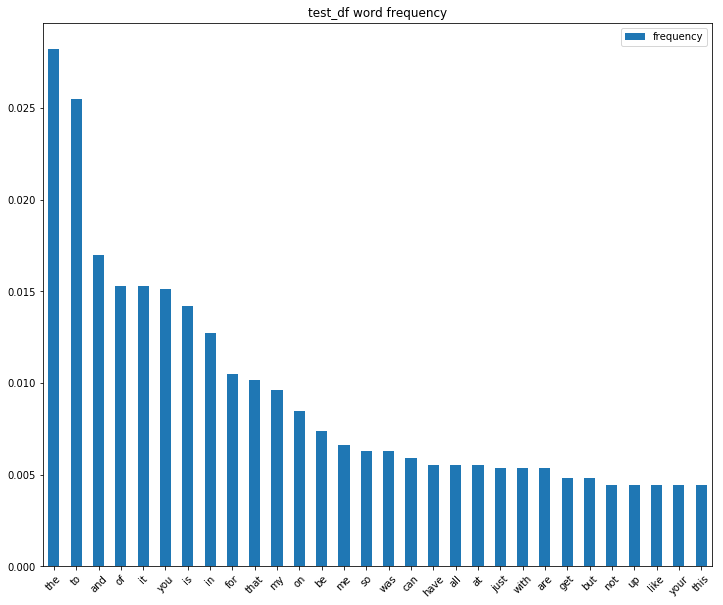

In [4]:
test_vec = vectorizer.fit_transform(test_df.text)
test_word = vectorizer.get_feature_names()

test_words = {}
for i in range(len(test_word)):
    test_words[i]=test_word[i]
test_tf = pd.DataFrame(test_vec.toarray())
test_tf = test_tf.rename(test_words,axis = 1)
test_tf.loc['frequency']=test_tf.sum(axis = 0)

test_tf_= pd.DataFrame(test_tf.loc['frequency'])
test_tf_.sort_values(by = 'frequency',ascending=False,inplace = True)
test_tf_ = test_tf_.apply(lambda x :x/test_tf_['frequency'].sum())

test_tf_[0:30].plot.bar(figsize = (12,10))
plt.xticks(rotation=45)
plt.title('test_df word frequency')
plt.show()

---
### ** >Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
Tfidf_vectorizer = TfidfVectorizer(max_features=1000,tokenizer = nltk.word_tokenize,use_idf=True)
train_tfidf_vec = Tfidf_vectorizer.fit_transform(train_df.text)
train_tfidf_word = Tfidf_vectorizer.get_feature_names()
train_tfidf_vec.shape

(3613, 1000)

In [6]:
train_tfidf_vec.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18187923, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14634094, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
train_tfidf_word[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** > Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [8]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


array(['fear', 'anger', 'anger', 'sadness', 'fear', 'joy', 'anger',
       'fear', 'anger', 'fear'], dtype=object)

In [9]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

training accuracy: 0.99
testing accuracy: 0.64
              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [10]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

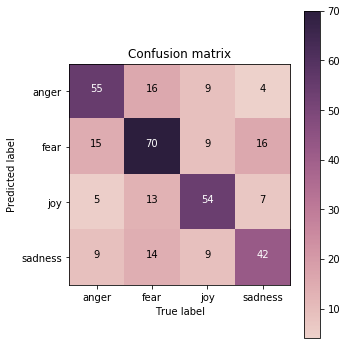

In [11]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

explaination:

the confution matrix shows the prediction result compares with ground truth

from the plot,for example,we can observe that the misjudgement rate of ['sadness' label  to 'fear'] is higher than others

So,we can assume that 'sadness' and 'fear' two categories maybe has some covariance

that will give us some direction to enhance our pre-processing method to further improve model's performence



### ** > Exercise 4 (Take home): **  

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



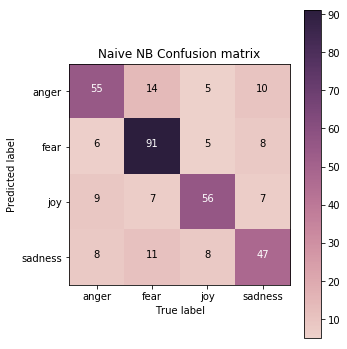

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_y_test_pred = nb.predict(X_test)
print(classification_report(y_true=y_test, y_pred=nb_y_test_pred))
nb_cm = confusion_matrix(y_true=y_test, y_pred=nb_y_test_pred) 
plot_confusion_matrix(nb_cm, classes=my_tags, title='Naive NB Confusion matrix')

---
### ** > Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

explanation:

we can observe that the accuracy of NB is better than DecisionTree. 

I thought that because of scale of the dataset.

NB assume that each features is independent,so it can directly map the feature to the label ,but it won't consider the covariance between the features.

DecisionTree is based on conditional probability,but it tends to over-fit the small data set

### ** > Exercise 6(Take home): **  
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [13]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

E:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [14]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 62        anger
2982    sadness
3121    sadness
3281    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)
input_shape:  500
output_shape:  4


In [15]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0         
Total para

In [16]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('exercise6_training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 16s 4ms/step - loss: 1.3367 - acc: 0.3548 - val_loss: 1.2792 - val_acc: 0.3948
Epoch 2/25
3613/3613 [==============================] - 1s 261us/step - loss: 0.9974 - acc: 0.6438 - val_loss: 0.9039 - val_acc: 0.6513
Epoch 3/25
3613/3613 [==============================] - 1s 220us/step - loss: 0.5690 - acc: 0.7993 - val_loss: 0.7711 - val_acc: 0.6859
Epoch 4/25
3613/3613 [==============================] - 1s 218us/step - loss: 0.4093 - acc: 0.8492 - val_loss: 0.7669 - val_acc: 0.6859
Epoch 5/25
3613/3613 [==============================] - 1s 204us/step - loss: 0.3227 - acc: 0.8774 - val_loss: 0.8076 - val_acc: 0.6945
Epoch 6/25
3613/3613 [==============================] - 1s 216us/step - loss: 0.2680 - acc: 0.9056 - val_loss: 0.8674 - val_acc: 0.6830
Epoch 7/25
3613/3613 [==============================] - 1s 219us/step - loss: 0.2245 - acc: 0.9217 - val_loss: 0.9134 - val_acc: 0.6945
Ep

In [17]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[3.6850055e-05, 9.9495548e-01, 4.9977803e-05, 4.9576135e-03],
       [9.6651924e-01, 6.3563511e-04, 6.9853638e-07, 3.2844443e-02],
       [9.9909759e-01, 7.0519926e-04, 1.8692692e-04, 1.0306839e-05],
       [1.0725959e-01, 1.3052790e-03, 7.1727425e-01, 1.7416090e-01],
       [9.1137644e-03, 9.9068052e-01, 1.7436199e-04, 3.1411520e-05]],
      dtype=float32)

In [18]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'anger', 'joy', 'fear'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [20]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,acc,loss,val_acc,val_loss
0,0,0.349848,1.333412,0.438040,1.290668
1,1,0.616662,1.017402,0.631124,0.973613
2,2,0.792139,0.599234,0.697406,0.805977
3,3,0.856075,0.408494,0.706052,0.819154
4,4,0.889289,0.317536,0.680115,0.829515
5,5,0.915859,0.253498,0.677233,0.853639
6,6,0.934404,0.201381,0.654179,0.974444
7,7,0.947412,0.168846,0.700288,0.977787
8,8,0.950457,0.150403,0.671470,1.067882
9,9,0.963465,0.127094,0.680115,1.144580


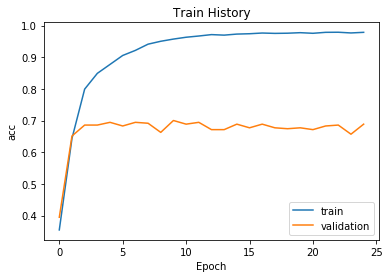

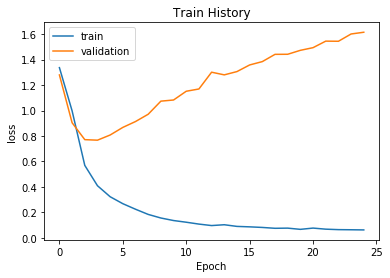

In [21]:
def show_train_history(train_history, train, validation):
    fig = plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    


show_train_history(history, 'acc', 'val_acc',)
show_train_history(history, 'loss', 'val_loss')

explanation:

from the grapth I found that the training loss keeps decreasing that means there is no under-fitting problem at training.

but since 3rd epoch,the validation loss keeps increasing that means the model is over-fitting to the training dataset,that is the reason that model got bad performence in validation dataset.

If I have to choose a model to implement on my task I will choose the 3rd epoch.

---
### ** > Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [22]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
62,10062,So angry I wanna cry😢😢😢,"[So, angry, I, wan, na, cry😢😢😢]"
2982,40155,I was in the dark room for 58 minutes and fail...,"[I, was, in, the, dark, room, for, 58, minutes..."
3121,40294,The new lock sound is grim,"[The, new, lock, sound, is, grim]"
3281,40454,"So I tried to give her time to sober up, while...","[So, I, tried, to, give, her, time, to, sober,..."
3330,40503,Candice's pout gets more preposterous by the w...,"[Candice, 's, pout, gets, more, preposterous, ..."


In [23]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['So', 'angry', 'I', 'wan', 'na', 'cry😢😢😢']),
       list(['I', 'was', 'in', 'the', 'dark', 'room', 'for', '58', 'minutes', 'and', 'failed', 'every', 'time', 'I', 'tried', 'developing', 'a', 'photo', 'I', "'m", 'so', 'frustrated', 'with', 'myself', ':', "'", ')']),
       list(['The', 'new', 'lock', 'sound', 'is', 'grim'])], dtype=object)

In [24]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
62,10062,So angry I wanna cry😢😢😢,"[So, angry, I, wan, na, cry😢😢😢]"
2982,40155,I was in the dark room for 58 minutes and fail...,"[I, was, in, the, dark, room, for, 58, minutes..."
3121,40294,The new lock sound is grim,"[The, new, lock, sound, is, grim]"
3281,40454,"So I tried to give her time to sober up, while...","[So, I, tried, to, give, her, time, to, sober,..."
3330,40503,Candice's pout gets more preposterous by the w...,"[Candice, 's, pout, gets, more, preposterous, ..."


In [25]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [26]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 3.13710421e-01, -5.79342902e-01, -4.45840299e-01,  1.09504724e+00,
        1.28186475e-02, -4.96625066e-01, -3.45668852e-01, -4.86282080e-01,
       -4.65150684e-01,  4.83451396e-01, -5.56095183e-01, -5.49184620e-01,
       -7.87780344e-01,  7.66101003e-01, -1.86473727e-02,  1.11470068e+00,
        3.91694665e-01,  1.81558415e-01, -7.67633379e-01,  3.99274707e-01,
        1.83728039e-01, -5.05923986e-01, -5.44963181e-01,  2.75461674e-01,
        3.53839517e-01, -1.22322291e-01,  3.48305225e-01, -1.27266550e+00,
       -2.76651848e-02,  6.03321731e-01,  2.69069970e-01,  2.20619678e-01,
        4.06186163e-01,  4.94185299e-01, -7.23489165e-01,  6.08544707e-01,
        3.10932156e-02,  4.39866260e-02,  3.62550318e-02,  2.21740171e-01,
        3.62822860e-01, -2.76579019e-02,  2.62169898e-01, -6.20963871e-01,
        3.03301275e-01,  2.65546422e-02,  8.63407031e-02,  1.82139426e-02,
        5.76543212e-01, -2.68538177e-01, -3.44085336e-01, -2.78661512e-02,
       -3.73190910e-01, -

In [27]:
# Get the most similar words
word = 'Yo'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('candy', 0.9934147596359253),
 ('3x', 0.9925948977470398),
 ('Brad', 0.992171049118042),
 ('overtime', 0.9907786846160889),
 ('1.', 0.990588903427124),
 ('complete', 0.9903865456581116),
 ('hanging', 0.9901512861251831),
 ('investigated', 0.9901058077812195),
 ('afternoon', 0.9900699257850647),
 ('stories', 0.9897726774215698)]

---
utilize word vector:

use the trained word2vec model 'word2vec_model',and apply it on each sentence to generate the word vector

in order to train our model

In [28]:
train_df['text_data_vec'] = train_df['text_tokenized'].apply(lambda x :word2vec_model.wv[x])
train_df[['text_tokenized','text_data_vec']].head()

,text_tokenized,text_data_vec
62,"[So, angry, I, wan, na, cry😢😢😢]","[[0.22607876, -0.39028662, -0.237006, 0.602128..."
2982,"[I, was, in, the, dark, room, for, 58, minutes...","[[0.15847088, -0.3839421, -0.63711953, 1.27564..."
3121,"[The, new, lock, sound, is, grim]","[[0.19676913, -0.14002934, -0.4970077, 0.89667..."
3281,"[So, I, tried, to, give, her, time, to, sober,...","[[0.22607876, -0.39028662, -0.237006, 0.602128..."
3330,"[Candice, 's, pout, gets, more, preposterous, ...","[[0.017361844, -0.15883952, -0.13095145, 0.317..."


---
### ** > Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [1]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin."
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [2]:
word_list = ['angry','happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)] 
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        
print('\ntarget words: ')
print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words+happy_words+sad_words+fear_words

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


target words: 
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', '

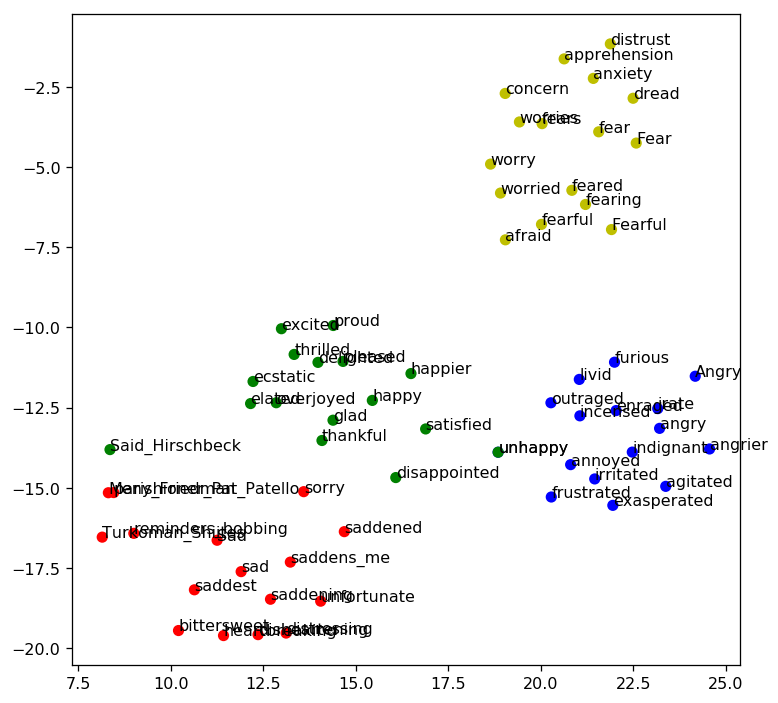

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---

### Second,Third -kaggle competition report

before pre-processing, I do some privious work to generate the raw dataset from tweet_DM.json

step 1 :load tweet_DM.json and translate into raw set that only have 'tweet_id' and 'text' column

step 2 :according to 'data_identification.csv' spilt raw set into train set and test set

step 3 :merge 'emotion.csv' and train set on 'tweet_id',then it's time to do some pre-processing

In [1]:
###pre-processing
import pandas as pd
df = pd.read_csv('trainset.csv',lineterminator = '\n')
#df = pd.read_csv('testset_sample.csv',lineterminator = '\n')
df.columns = ['id','text','emotion']
df[0:5]

,id,text,emotion
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <L...,joy\r
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation\r
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,joy\r
3,0x1c7f15,I'm one of those people who love candy corn......,joy\r
4,0x1c7f16,@metmuseum What are these? They look like some...,disgust\r


In [2]:
df['emotion']=df['emotion'].apply(lambda x:x.replace('\r',''))
df[0:5]

,id,text,emotion
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <L...,joy
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,joy
3,0x1c7f15,I'm one of those people who love candy corn......,joy
4,0x1c7f16,@metmuseum What are these? They look like some...,disgust


In [3]:
###remove @blahblah ,numbers,hashtag and <LH>
import re
import numpy as np
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,' ',input_txt)
    return input_txt
df['text']=np.vectorize(remove_pattern)(df['text'],'@[\w]*')
df['text']=np.vectorize(remove_pattern)(df['text'],'<LH>')
df['text']=np.vectorize(remove_pattern)(df['text'],'#')
df['text']=np.vectorize(remove_pattern)(df['text'],'[0-9]')
df[0:5]

,id,text,emotion
0,0x1c7f10,o m g Shut Up And Dance though BlackMirror \r,joy
1,0x1c7f11,On twitch on the Destinybeta Destiny Des...,anticipation
2,0x1c7f14,A nice sunny wak this morning not many aroud...,joy
3,0x1c7f15,I'm one of those people who love candy corn......,joy
4,0x1c7f16,What are these? They look like something tod...,disgust


In [4]:
###tokenization,use tweet tokenizer
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer(reduce_len = True)
df['text']=df['text'].str.lower()
df['text']=df['text'].apply(lambda x :token.tokenize(x))
df[0:5]

,id,text,emotion
0,0x1c7f10,"[o, m, g, shut, up, and, dance, though, blackm...",joy
1,0x1c7f11,"[on, twitch, on, the, destinybeta, destiny, de...",anticipation
2,0x1c7f14,"[a, nice, sunny, wak, this, morning, not, many...",joy
3,0x1c7f15,"[i'm, one, of, those, people, who, love, candy...",joy
4,0x1c7f16,"[what, are, these, ?, they, look, like, someth...",disgust


In [5]:
###remove stopwords and punctuation 
from nltk.corpus import stopwords
import string
stop = stopwords.words('english')
df['text']=df['text'].apply(lambda x :[item for item in x if item not in stop])
punctuation = list(string.punctuation)
punctuation.append('...')
df['text']=df['text'].apply(lambda x :[item for item in x if item not in punctuation])
df[0:5]

,id,text,emotion
0,0x1c7f10,"[g, shut, dance, though, blackmirror]",joy
1,0x1c7f11,"[twitch, destinybeta, destiny, destiny, destin...",anticipation
2,0x1c7f14,"[nice, sunny, wak, morning, many, aroud, white...",joy
3,0x1c7f15,"[i'm, one, people, love, candy, corn, lot, 😁, ...",joy
4,0x1c7f16,"[look, like, something, toddlers, make, summer...",disgust


In [6]:
###lemmatize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['text']=df['text'].apply(lambda x:[lemmatizer.lemmatize(item) for item in x])
df['text'][0:5]

0                [g, shut, dance, though, blackmirror]
1    [twitch, destinybeta, destiny, destiny, destin...
2    [nice, sunny, wak, morning, many, aroud, white...
3    [i'm, one, people, love, candy, corn, lot, 😁, ...
4    [look, like, something, toddler, make, summer,...
Name: text, dtype: object

In [7]:
###save the clean set in order to train
#df.to_csv('cleantrain_set_lem.csv',index = 0)
#df.to_csv('cleantest_set_lem.csv',index = 0)

after pre-processing, I try to build a LSTM-CNN model to do the task

and use GoogleNews-vectors-negative300.bin pre-trained word2vec model for embedding 

In [8]:
import keras
###load training,testing set,dealwith null value(due to pre-processing)
data = pd.read_csv('cleantrain_set_lem.csv')
testdata = pd.read_csv('cleantest_set_lem.csv')

print('null in data:\n',np.sum(data.isnull()))
print('null in testdata:\n',np.sum(testdata.isnull()))

Using TensorFlow backend.


null in data:
 id            0
text       4466
emotion       8
dtype: int64
null in testdata:
 id       0
text    37
dtype: int64


In [9]:
data.dropna(inplace = True)
testdata.fillna('thisisnull',inplace=True)
print('null in data:\n',np.sum(data.isnull()))
print('null in testdata:\n',np.sum(testdata.isnull()))

null in data:
 id         0
text       0
emotion    0
dtype: int64
null in testdata:
 id      0
text    0
dtype: int64


In [10]:
###load pre-trained word2vec model
import gensim.models.keyedvectors as word2vec
w2vModel = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,limit=500000)
print('successful load')

successful load


In [11]:
### Create sequence
from keras.preprocessing.text import Tokenizer
#take most often 100000 words to word_dic
vocabulary_size = 100000 
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(data['text'])
#transform words to a sequence
sequences = tokenizer.texts_to_sequences(data['text'])
sequences[0:5]

[[710, 1308, 1060, 368, 21554],
 [2126,
  62451,
  1243,
  1243,
  49064,
  6084,
  6278,
  27326,
  1243,
  27327,
  4542,
  1243,
  4542,
  474],
 [268, 2376, 54535, 74, 103, 74187, 332, 13, 2064, 41280, 48, 614],
 [9, 12, 16, 1, 2523, 4201, 44, 264, 20, 3709, 26373, 8485, 15321],
 [63, 8, 119, 4022, 17, 527, 2279, 4901, 14538]]

In [12]:
###check length of sequence
import matplotlib.pyplot as plt
text_len = [len(x) for x in sequences]
histo = pd.Series(text_len).value_counts()
histo.sort_index(inplace=True)
histo = pd.DataFrame(histo,columns = ['counts'])
plt.figure(figsize=(8,6))
histo[0:25].plot.bar()
plt.xticks(rotation=360)
plt.title('sequences length')
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 1 Axes>

In [13]:
#pad or cut each sequence to proper length
sequence_len = int(50) 
from keras.preprocessing.sequence import pad_sequences
train = pad_sequences(sequences, maxlen=sequence_len)
train[0:4]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
          710,  1308,  1060,   368, 21554],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
         2126, 62451,  1243,  1243, 49064,  6084,  6278, 27326,  1243,
        27327,  4542,  1243,  4542,   474],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

In [14]:
###Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['emotion'])
print('check label: \n', le.classes_)
print('\n### Before convert')
print('data[emotion]:\n', data['emotion'][0:5])
print('\n data[emotion].shape: ', data['emotion'].shape)
#transform sentumental label to one-hot label
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
data_label = label_encode(le, data['emotion'])
print('\n\n### After convert')
print('data_label:\n', data_label[0:5])
print('\n data_label.shape: ', data_label.shape)

check label: 
 ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

### Before convert
data[emotion]:
 0             joy
1    anticipation
2             joy
3             joy
4         disgust
Name: emotion, dtype: object

 data[emotion].shape:  (1451093,)


### After convert
data_label:
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]

 data_label.shape:  (1451093, 8)


In [15]:
###split train,valid set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data_label, 
                                                    test_size=0.3,shuffle = True,random_state = 10)
print('train data_size:', X_train.shape)
print('test data_size:', X_test.shape)

train data_size: (1015765, 50)
test data_size: (435328, 50)


In [16]:
###deep learning
#input is padded sequence,output is one-hot label
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)
output_shape = len(le.classes_)
print('output_shape: ', output_shape)

input_shape:  50
output_shape:  8


In [17]:
#import the package we needed
from keras.models import Model
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import LSTM,Activation,concatenate,Input
from keras.models import load_model
from keras import optimizers 
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from keras.callbacks import CSVLogger,EarlyStopping,ModelCheckpoint
csv_logger = CSVLogger('training_log.csv')

In [18]:
###use GPU to accelerate training
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [19]:
#hyper parameters
learning_rate = 0.001
epochs = 50
batch_size = 512
#build CNN-LSTM model
model_input = Input(shape = (input_shape,))
embed = Embedding(input_dim=w2vModel.syn0.shape[0], 
                            output_dim=w2vModel.syn0.shape[1],
                            weights=[w2vModel.syn0],
                            input_length=input_shape)(model_input)
BN1 = BatchNormalization()(embed)
em_Drop = Dropout(0.5)(BN1)

LSTM1 = LSTM(units=256,unroll = True, recurrent_initializer='orthogonal',
             return_sequences=True,dropout=0.5, recurrent_dropout=0.5)(em_Drop)
LSTM_BN = BatchNormalization()(LSTM1)
cnn2=Conv1D(filters=128, kernel_size=2,padding='valid',activation='relu')(LSTM_BN)                     
GAP2 = GlobalAveragePooling1D()(cnn2)
cnn3=Conv1D(filters=128, kernel_size=3,padding='valid',activation='relu')(LSTM_BN)                
GAP3 = GlobalAveragePooling1D()(cnn3)
cnn5=Conv1D(filters=128, kernel_size=5,padding='valid',activation='relu')(LSTM_BN)
GAP5 = GlobalAveragePooling1D()(cnn5)
GAP_out = concatenate([GAP2,GAP3,GAP5], axis=-1)


FC = Dense(units=output_shape,activation='softmax' )(GAP_out)
model = Model(inputs=model_input, outputs=FC)
print(model.summary())


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  if __name__ == '__main__':


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 300)      150000000   input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 300)      1200        embedding_1[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 50, 300)      0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
lstm_1 (LS

In [20]:
# define loss function & optimizer
adam = optimizers.Adam(lr=learning_rate)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
###callback csv_logger,Modelcheckpoint and Earlystopping
earlystopping=EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')
BEST_MODEL_DIR = "C:/Users/user/Downloads/DMHW2/best_val_loss.h5"
save_best = ModelCheckpoint(BEST_MODEL_DIR, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [22]:
#train the model
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger,earlystopping,save_best],
                    validation_data = (X_test, y_test))
print('training finish')

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 150000000 elements. This may consume a large amount of memory.
  num_elements)


Train on 1015765 samples, validate on 435328 samples
Epoch 1/50
1015765/1015765 [==============================] - 371s 365us/step - loss: 1.4702 - acc: 0.4649 - val_loss: 1.5627 - val_acc: 0.5042
Epoch 2/50
1015765/1015765 [==============================] - 346s 340us/step - loss: 1.3173 - acc: 0.5251 - val_loss: 1.3329 - val_acc: 0.5328
Epoch 3/50
1015765/1015765 [==============================] - 350s 345us/step - loss: 1.2711 - acc: 0.5427 - val_loss: 1.2595 - val_acc: 0.5507
Epoch 4/50
1015765/1015765 [==============================] - 352s 346us/step - loss: 1.2391 - acc: 0.5552 - val_loss: 1.2509 - val_acc: 0.5539
Epoch 5/50
1015765/1015765 [==============================] - 354s 348us/step - loss: 1.2136 - acc: 0.5645 - val_loss: 1.2517 - val_acc: 0.5546
Epoch 6/50
1015765/1015765 [==============================] - 341s 336us/step - loss: 1.1906 - acc: 0.5728 - val_loss: 1.2483 - val_acc: 0.5569
Epoch 7/50
1015765/1015765 [==============================] - 350s 345us/step - los

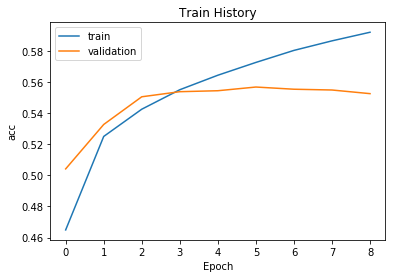

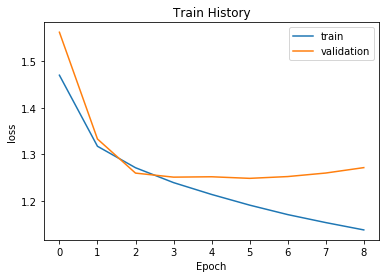

In [23]:
def show_train_history(train_history, train, validation):
    fig = plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    


show_train_history(history, 'acc', 'val_acc',)
show_train_history(history, 'loss', 'val_loss')

In [24]:
###predict on public test set and creat submission file
###load the model
SAVE_MODEL_DIR = "best_val_loss.h5"
model = load_model(SAVE_MODEL_DIR)

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 150000000 elements. This may consume a large amount of memory.
  num_elements)


In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_true = label_decode(le,y_test)
y_pred = model.predict(X_test, batch_size=512)
y_pred = label_decode(le,y_pred)
matrix = pd.DataFrame(confusion_matrix(y_true,y_pred,labels =le.classes_),
                      index =le.classes_,columns =le.classes_)
print(matrix)
print(classification_report(y_true=y_true, y_pred=y_pred,target_names = le.classes_))

              anger  anticipation  disgust  fear     joy  sadness  surprise  \
anger          3858           602     1824   114    2675     2496       108   
anticipation    372         42399     2214   647   20885     4484       340   
disgust        1219          1923    17416   498    9072    10074       507   
fear            193          1499     1133  7467    5833     2337       175   
joy             743         12027     4664  1324  118304     8765       763   
sadness        1107          3127     7256   654   14332    29757       608   
surprise        158           992     1567   258    4824     2643      3783   
trust           290          6865     2245   417   28358     3546       272   

              trust  
anger           237  
anticipation   3048  
disgust         934  
fear            489  
joy            7343  
sadness        1378  
surprise        418  
trust         19468  
              precision    recall  f1-score   support

       anger       0.49      0.32  

In [26]:
###tokenize test data and generate the sequence 
test_sequences = tokenizer.texts_to_sequences(testdata['text'])
_testdata = pad_sequences(test_sequences, maxlen=sequence_len)
pred_result = model.predict(_testdata, batch_size=512)
pred_result = label_decode(le, pred_result)
pred = pd.Series(pred_result)
testdata.reset_index(inplace = True)
testdata['emotion']=pred
testdata.drop(['text'],axis = 1,inplace = True)
testdata.to_csv('prediction.csv',index = 0)
testdata[0:5]

,index,id,emotion
0,0,0x1c7f0f,disgust
1,1,0x1c7f12,joy
2,2,0x1c7f13,anticipation
3,3,0x1c7f17,anticipation
4,4,0x1c7f18,sadness


I finally got 0.44076 acc on kaggle competition.

At first, I tried to stack serval Dense layers to build a fully-connected model,but it got bad performance(0.40~0.42)

Then I tried SimpleRNN , LSTM,Bidirectional LSTM ,it slightly increase the acc(0.42~0.44)

At last,I decided to cascade LSTM and CNN together and use the Google-news word2vec pre-trained model,because LSTM can learn the connection in texts,after that ,1D CNN can learn the spatial relationships in sequence.

I use Dropout layer and GlobalAveragePooling layer ,in order to avoid from over-fitting.


I discovered that different embedding output_dim(I thought that refer to the dimentionality of data),different units of each layer(CNN,LSTM,Dense),different hyperparameter(learning rate,batchsize),and use Early stopping in order to prevent from over-fitting

this competition is quite challenging for me, but inspire me a lot

Hope that I could do better in final project 👍

###  > Forth - tidy up the code

tks for watching